Question: Does age affect the ride duration for Citi Bike trips taken in January, 2016?

Alternative hypothesis: There is a negative correlation between age of riders and trip duration,
    with a .05 confidence level.
    
Null hypothesis: Age and trip duration are inversely related at less than a .05 confidence interval
    OR there is no apparent relationship
    OR there is a positive relationship.

In [1]:
from __future__  import print_function, division
import pylab as pl
import pandas as pd
import numpy as np
import os

%pylab inline

if os.getenv ('PUI2016') is None:
    print ("Must set env variable PUI2016")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2016")

import os
import json

Populating the interactive namespace from numpy and matplotlib


In [2]:
get_ipython().system("curl -O 'https://s3.amazonaws.com/tripdata/201601-citibike-tripdata.zip'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 16.9M  100 16.9M    0     0  12.8M      0  0:00:01  0:00:01 --:--:-- 16.9M


In [3]:
# get_ipython().system('unzip 201601-citibike-tripdata.zip')

Archive:  201601-citibike-tripdata.zip
replace 201601-citibike-tripdata.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [7]:
df = pd.read_csv('201601-citibike-tripdata.csv')

In [8]:
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,923,1/1/2016 00:00:41,1/1/2016 00:16:04,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22285,Subscriber,1958.0,1
1,379,1/1/2016 00:00:45,1/1/2016 00:07:04,476,E 31 St & 3 Ave,40.743943,-73.979661,498,Broadway & W 32 St,40.748549,-73.988084,17827,Subscriber,1969.0,1
2,589,1/1/2016 00:00:48,1/1/2016 00:10:37,489,10 Ave & W 28 St,40.750664,-74.001768,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,21997,Subscriber,1982.0,2
3,889,1/1/2016 00:01:06,1/1/2016 00:15:56,268,Howard St & Centre St,40.719105,-73.999733,3002,South End Ave & Liberty St,40.711512,-74.015756,22794,Subscriber,1961.0,2
4,1480,1/1/2016 00:01:12,1/1/2016 00:25:52,2006,Central Park S & 6 Ave,40.765909,-73.976342,2006,Central Park S & 6 Ave,40.765909,-73.976342,14562,Subscriber,1952.0,1


In [10]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender'],
      dtype='object')

In [11]:
df.drop([u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'gender'], axis=1, inplace=True)

In [12]:
df.head()
# gender 1 is male, 2 is female

,tripduration,birth year
0,923,1958.0
1,379,1969.0
2,589,1982.0
3,889,1961.0
4,1480,1952.0


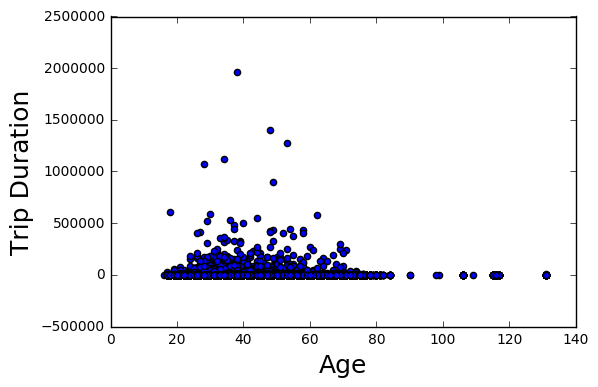

In [14]:
x = 2016 - df['birth year']
y = df['tripduration']
pl.scatter(x, y)

pl.xlabel('Age', fontsize = 18)
pl.ylabel('Trip Duration', fontsize = 18)

Realizing now that I haven't picked a categorical variable for the x axis (independent variable), so I'm trying it next as a histogram instead of a scatter plot.

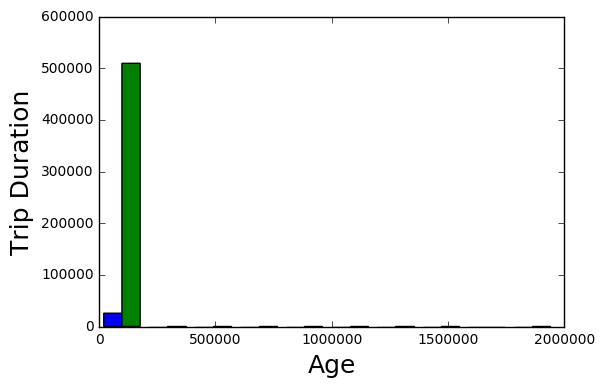

In [15]:
# not finding this useful after all
pl.hist([x,y])

pl.xlabel('Age', fontsize = 18)
pl.ylabel('Trip Duration', fontsize = 18)